# Ćwiczenia 1
W trakcie ćwiczeń implementowana będzie metoda przeszukiwania - Metoda gradientu prostego.
Celem ćwiczeń jest implementacja metody gradientu prostego dla dwóch funkcji oraz przebadanie wpływu rozmiaru kroku dla różnych (losowych) punktów początkowych. Należy zwizualizować proces minimalizacji na wykresie 2D.

## Punktacja:
 - obliczenie gradientów funkcji 1 pkt
 - implementacja kroku gradientu prostego 1 pkt
 - przeprowadzenie przeszukiwania minimum na obu funkcjach 1 pkt
 - wizualizacja przeszukiwania z wielu miejsc początkowych 1 pkt


In [87]:
from typing import Callable, Tuple
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Funkcje do przeszukania:
\begin{equation}
f(\textbf{x})=x_1^2+x_2^2
\end{equation}

\begin{equation}
g(x) = 1.5-\exp \left\{-x_1^2-x_2^2\right\}-0.5 \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{equation}

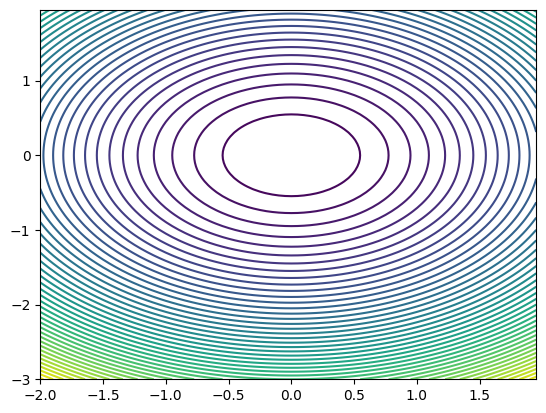

In [88]:
# Function to analyze
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2

# Contour plot en 2D
plt.figure()
plt.contour(X, Y, Z, 50)

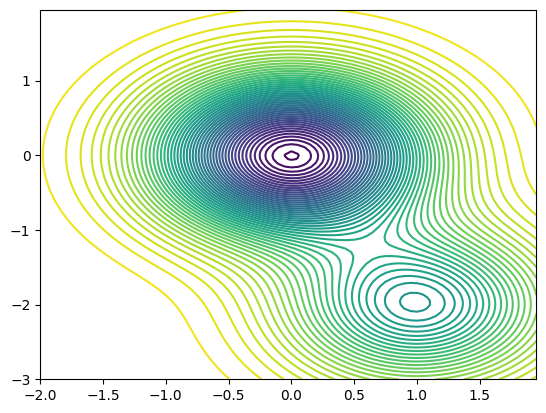

In [89]:
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z =1.5-np.exp(-X**(2)-Y**(2))-0.5*np.exp(-(X-1)**(2)-(Y+2)**(2))
# Contour plot en 2D

plt.figure()
plt.contour(X, Y, Z, 50)


Gradienty funkcji
\begin{equation}
\nabla f(x)=
\begin{bmatrix}
2x_1 \\
2x_2
\end{bmatrix}
\end{equation}

\begin{equation}
\nabla g(x)=
\begin{bmatrix}
2 x_1 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_1-1\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\} \\
2 x_2 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_2+2\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{bmatrix}
\end{equation}

In [107]:
class SimpleGradientDescent:
    X = np.arange(-2, 2, 0.05)
    Y = np.arange(-3, 2, 0.05)
    X, Y = np.meshgrid(X, Y)

    def __init__(self,
                 func: Callable[[float, float], float],
                 grad_func: Callable[[float, float], Tuple[float, float]],
                 alpha:float=0.1):
        self.alpha = alpha
        self.func = func
        self.grad_func = grad_func
        self.trace = None  # trace of search

    def _calc_Z_value(self):
        self.Z = self.func(self.X, self.Y)

    def plot_func(self):
        self._calc_Z_value()
        plt.figure()
        diag = plt.contour(self.X, self.Y, self.Z, 50)
        plt.clabel(diag)
        if len(self.trace)>0:
          for i in range(1, len(self.trace)):
            plt.annotate('', xy=(self.trace[i][0], self.trace[i][1]), xytext=(self.trace[i-1][0], self.trace[i-1][1]), arrowprops={'arrowstyle':'->'})
          plt.scatter(self.trace[:,0], self.trace[:,1], s=10)

    def calculate_func_value(self, x1:float, x2:float) -> float:
        return(self.func(x1, x2))

    def calculate_func_grad(self, x1:float, x2:float) -> Tuple[float, float]:
        return(self.grad_func(x1, x2))

    def gradient_descent_step(self, x1:float, x2:float) -> Tuple[float, float]:
      grad_value = self.grad_func(x1, x2)
      x1 = x1 - self.alpha * grad_value[0]
      x2 = x2 - self.alpha * grad_value[1]
      return (x1, x2)

    def minimize(self, x1_init:float, x2_init:float, steps:int, verbose:int=0, plot:bool=False)->float:
      x1 = x1_init
      x2 = x2_init
      self.trace = np.zeros(shape = (steps + 1, 2))
      for step in range(steps):
        self.trace[step][0] = x1
        self.trace[step][1] = x2
        (x1, x2) = self.gradient_descent_step(x1, x2)
        if verbose > 0 and step % verbose == 0:
          print(f"Numer kroku: {step + 1}; aktualny punkt: {self.trace[step]}")
      self.trace[steps][0] = x1
      self.trace[steps][1] = x2
      if plot:
        self.plot_func()
      return(self.calculate_func_value(x1, x2))

# Funkcja 1

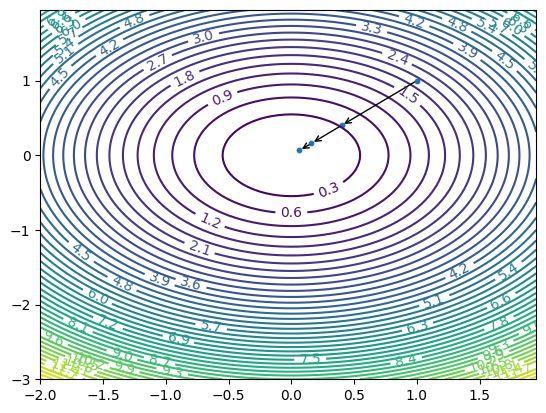

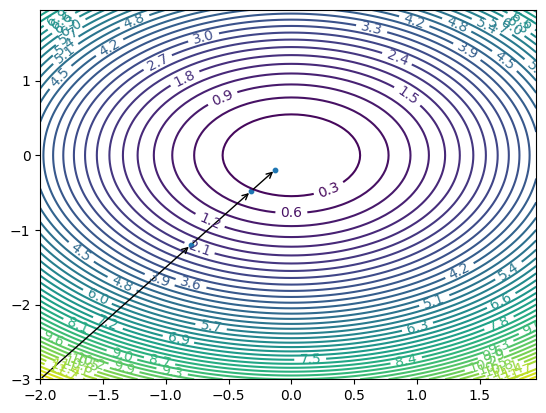

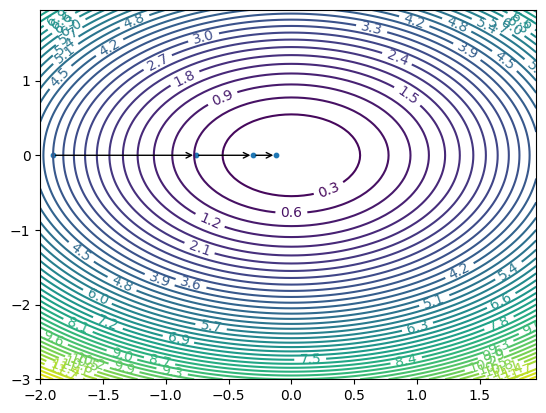

In [108]:
def func_one(x1: float, x2:float) -> float:
  return(x1**2 + x2**2)

def grad_one(x1:float, x2:float) -> Tuple[float, float]:
  return(2*x1, 2*x2)

f1_s1 = SimpleGradientDescent(func_one, grad_one, alpha=0.3)
f1_s1_res1 = f1_s1.minimize(1, 1, 3, plot=True)
f1_s1_res2 = f1_s1.minimize(-2, -3, 3, plot=True)
f1_s1_res3 = f1_s1.minimize(-1.9, 0, 3, plot=True)


f1_s2 = SimpleGradientDescent(func_one, grad_one, alpha=0.6)
f1_s2_res1 = f1_s2.minimize(-2, -3, 3)
f1_s2_res2 = f1_s2.minimize(1, 1, 3)
f1_s2_res3 = f1_s2.minimize(-1.9, 0, 3)


f1_s3 = SimpleGradientDescent(func_one, grad_one, alpha=1.1)
f1_s3_res1 = f1_s3.minimize(-2, -3, 3)
f1_s3_res2 = f1_s3.minimize(1, 1, 3)
f1_s3_res3 = f1_s3.minimize(-1.9, 0, 3)




In [113]:
print("Wyniki przeszukiwań funckji pierwszej:\n")
print(f"alpha = {f1_s1.alpha}")
print(f"Punkt początkowy: (1, 1); Wynik przesuzkiwań: {f1_s1_res1}") 
print(f"Punkt początkowy: (-2, -3); Wynik przesuzkiwań: {f1_s1_res2}")
print(f"Punkt początkowy: (0, 1); Wynik przesuzkiwań: {f1_s1_res3}\n")

print(f"alpha = {f1_s2.alpha}")
print(f"Punkt początkowy: (1, 1); Wynik przesuzkiwań: {f1_s2_res1}") 
print(f"Punkt początkowy: (-2, -3); Wynik przesuzkiwań: {f1_s2_res2}")
print(f"Punkt początkowy: (0, 1); Wynik przesuzkiwań: {f1_s2_res3}\n")

print(f"alpha = {f1_s3.alpha}")
print(f"Punkt początkowy: (1, 1); Wynik przesuzkiwań: {f1_s3_res1}") 
print(f"Punkt początkowy: (-2, -3); Wynik przesuzkiwań: {f1_s3_res2}")
print(f"Punkt początkowy: (0, 1); Wynik przesuzkiwań: {f1_s3_res3}\n")


Wyniki przeszukiwań funckji pierwszej:

alpha = 0.3
Punkt początkowy: (1, 1); Wynik przesuzkiwań: 0.008192000000000003
Punkt początkowy: (-2, -3); Wynik przesuzkiwań: 0.05324800000000003
Punkt początkowy: (0, 1); Wynik przesuzkiwań: 0.014786560000000004

alpha = 0.6
Punkt początkowy: (1, 1); Wynik przesuzkiwań: 0.0008319999999999979
Punkt początkowy: (-2, -3); Wynik przesuzkiwań: 0.00012799999999999978
Punkt początkowy: (0, 1); Wynik przesuzkiwań: 0.00023103999999999974

alpha = 1.1
Punkt początkowy: (1, 1); Wynik przesuzkiwań: 38.81779200000003
Punkt początkowy: (-2, -3); Wynik przesuzkiwań: 5.971968000000005
Punkt początkowy: (0, 1); Wynik przesuzkiwań: 10.779402240000001



Numer kroku: 1; aktualny punkt: [1. 1.]
Numer kroku: 2; aktualny punkt: [-1.2 -1.2]
Numer kroku: 3; aktualny punkt: [1.44 1.44]


5.971968000000005

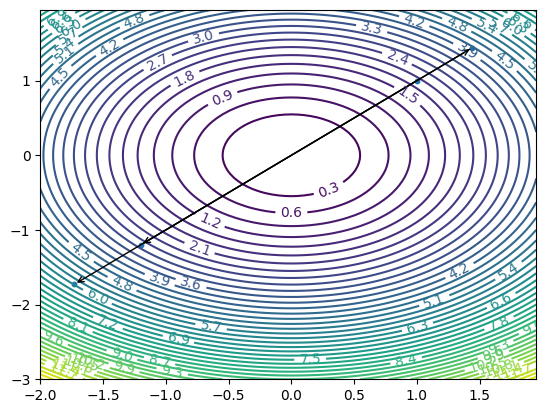

In [110]:
f1_s3.minimize(1, 1, 3, verbose = 1, plot=True)

# Funkcja 2

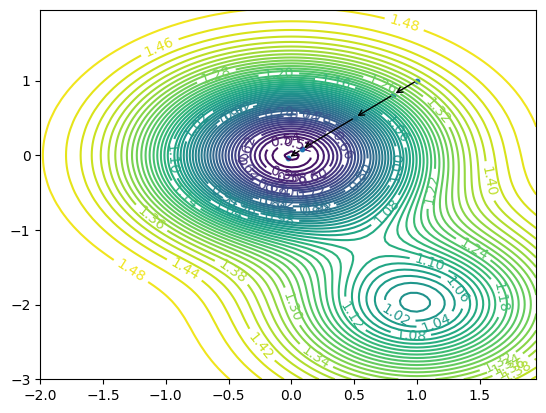

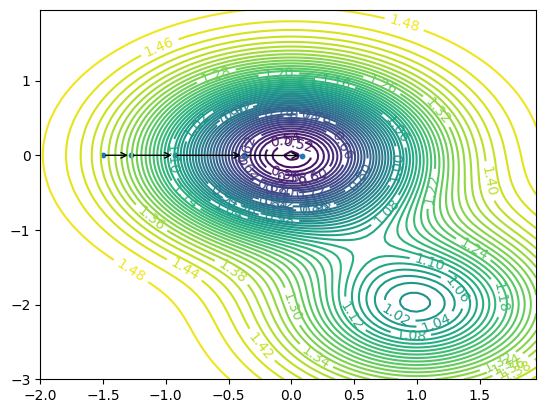

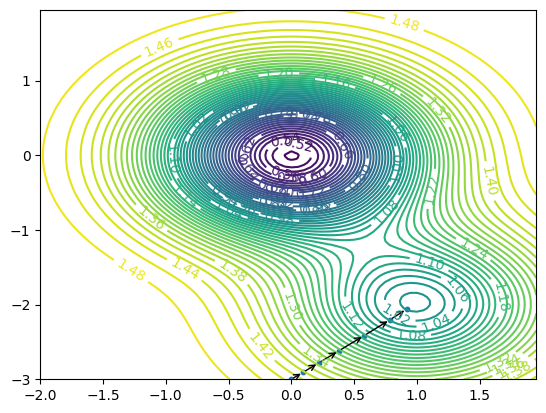

In [94]:
def func_two(x1: float, x2:float):
    return(1.5 - np.exp(- x1**2 - x2**2) - 0.5*np.exp(- (x1-1)**2 - (x2+2)**2))

def grad_two(x1: float, x2:float):
    return(2* x1 * np.exp(- x1**2 - x2**2) + (x1 - 1) * np.exp(- (x1-1)**2 - (x2 + 2)**2),
           2* x2 * np.exp(- x1**2 - x2**2) + (x2 + 2) * np.exp(- (x1-1)**2 - (x2 + 2)**2))

f2_s1 = SimpleGradientDescent(func_two, grad_two, alpha=0.7)
f2_s1_res1 = f2_s1.minimize(1, 1, 4, plot=True)
f2_s1_res2 = f2_s1.minimize(-1.5, 0, 4, plot=True)
f2_s1_res3 = f2_s1.minimize(0, -3, 6, plot=True)

f2_s2 = SimpleGradientDescent(func_two, grad_two, alpha=0.9)
f2_s2_res1 = f2_s2.minimize(1, 1, 4)
f2_s2_res2 = f2_s2.minimize(-1.5, 0, 4)
f2_s2_res3 = f2_s2.minimize(0, -3, 6)
#print(c)

In [116]:
print("Wyniki przeszukiwań funckji drugiej:\n")
print(f"alpha = {f2_s1.alpha}")
print(f"Punkt początkowy: (1, 1); Wynik przesuzkiwań: {f2_s1_res1}") 
print(f"Punkt początkowy: (-1.5, 0); Wynik przesuzkiwań: {f2_s1_res2}")
print(f"Punkt początkowy: (0, -3); Wynik przesuzkiwań: {f2_s1_res3}\n")

print(f"alpha = {f2_s2.alpha}")
print(f"Punkt początkowy: (1, 1); Wynik przesuzkiwań: {f2_s2_res1}") 
print(f"Punkt początkowy: (-1.5, 0); Wynik przesuzkiwań: {f2_s2_res2}")
print(f"Punkt początkowy: (0, -3); Wynik przesuzkiwań: {f2_s2_res3}\n")




Wyniki przeszukiwań funckji drugiej:

alpha = 0.7
Punkt początkowy: (1, 1); Wynik przesuzkiwań: 0.49848845115372253
Punkt początkowy: (-1.5, 0); Wynik przesuzkiwań: 0.5028811853396444
Punkt początkowy: (0, -3); Wynik przesuzkiwań: 0.998839765731816

alpha = 0.9
Punkt początkowy: (1, 1); Wynik przesuzkiwań: 0.5195717896550062
Punkt początkowy: (-1.5, 0); Wynik przesuzkiwań: 0.49843815260166935
Punkt początkowy: (0, -3); Wynik przesuzkiwań: 0.9927684122135645



Numer kroku: 1; aktualny punkt: [-2. -3.]
Numer kroku: 201; aktualny punkt: [-1.96213518 -2.98464678]
Numer kroku: 401; aktualny punkt: [-1.91221156 -2.96446081]
Numer kroku: 601; aktualny punkt: [-1.83949136 -2.93517463]
Numer kroku: 801; aktualny punkt: [-1.70749896 -2.88238206]
Numer kroku: 1001; aktualny punkt: [ 0.9945117 -1.9629721]


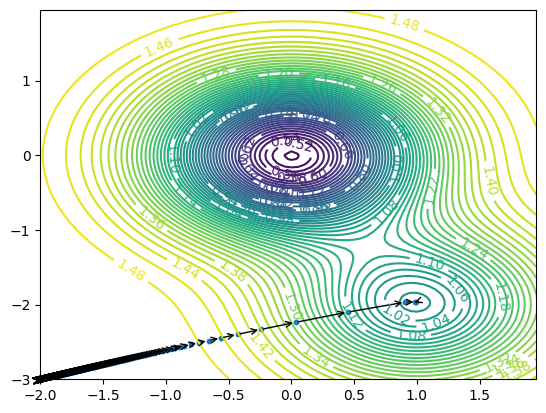

In [117]:
s2_2 = SimpleGradientDescent(func_two, grad_two, alpha= 1.158)
res4 = s2_2.minimize(-2, -3, 10**3 + 1, verbose=200, plot=True)